In [70]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as  mae
from sklearn.metrics import mean_squared_error as mse
import pickle
from itertools import combinations
from joblib import dump

In [71]:
df = pd.read_csv('PacificaClean.csv')

In [72]:
df

,CTDTMP [ITS-90],OXYGEN [UMOL/KG],TCARBN [UMOL/KG],PHSPHT [UMOL/KG],SILCAT [UMOL/KG],NITRAT [UMOL/KG],PH
0,4.547,119.10,2286.68,2.824,70.516,37.126,7.552423
1,4.533,100.64,2290.58,2.744,71.046,38.908,7.518387
2,4.536,130.80,2282.86,2.532,62.012,35.762,7.514944
3,4.536,130.80,2282.86,2.532,62.012,35.762,7.514944
4,4.536,130.80,2282.86,2.532,62.012,35.762,7.514944
...,...,...,...,...,...,...,...
277318,3.494,67.60,2290.04,2.880,120.580,41.750,7.565329
277319,2.898,82.60,2325.14,2.780,129.890,40.660,7.508111
277320,2.621,99.60,2342.30,2.770,133.730,40.110,7.487689
277321,2.339,115.70,2347.40,2.710,136.900,39.560,7.536210


In [75]:
nouveaux_noms = {
    'CTDTMP [ITS-90]': 'temp',
    'OXYGEN [UMOL/KG]': 'oxygen',
    'TCARBN [UMOL/KG]': 'tcarbn',
    'PHSPHT [UMOL/KG]': 'phspht',
    'SILCAT [UMOL/KG]': 'silcat',
    'NITRAT [UMOL/KG]': 'nitrat',
    # Ajouter les autres colonnes et leurs nouveaux noms
}

# Renommer les colonnes dans le DataFrame
df.rename(columns=nouveaux_noms, inplace=True)

In [76]:
df

,temp,oxygen,tcarbn,phspht,silcat,nitrat,PH
0,4.547,119.10,2286.68,2.824,70.516,37.126,7.552423
1,4.533,100.64,2290.58,2.744,71.046,38.908,7.518387
2,4.536,130.80,2282.86,2.532,62.012,35.762,7.514944
3,4.536,130.80,2282.86,2.532,62.012,35.762,7.514944
4,4.536,130.80,2282.86,2.532,62.012,35.762,7.514944
...,...,...,...,...,...,...,...
277318,3.494,67.60,2290.04,2.880,120.580,41.750,7.565329
277319,2.898,82.60,2325.14,2.780,129.890,40.660,7.508111
277320,2.621,99.60,2342.30,2.770,133.730,40.110,7.487689
277321,2.339,115.70,2347.40,2.710,136.900,39.560,7.536210


In [77]:
X=df.drop('PH', axis=1)
y=df['PH']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [79]:
pipeline=Pipeline([
     ('scaler',StandardScaler()),
     ('random forest', RandomForestRegressor())
   
])

In [80]:
parameters= { 
    'random forest__n_estimators': [200,300,400],
    'random forest__max_features': ['sqrt','log2'],
    'random forest__max_depth' : [3,4,5,6]
}

In [81]:
grid_search = GridSearchCV(pipeline,parameters,cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('random forest',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'random forest__max_depth': [3, 4, 5, 6],
                         'random forest__max_features': ['sqrt', 'log2'],
                         'random forest__n_estimators': [200, 300, 400]})

In [86]:
best_params = grid_search.best_params_

In [87]:
print("Meilleurs paramètres:", best_params)

Meilleurs paramètres: {'random forest__max_depth': 6, 'random forest__max_features': 'sqrt', 'random forest__n_estimators': 200}


In [88]:
best_pipeline = grid_search.best_estimator_

In [89]:
best_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('random forest',
                 RandomForestRegressor(max_depth=6, max_features='sqrt',
                                       n_estimators=200))])

In [56]:
y_pred= best_pipeline.predict(X_test)

In [90]:
print("Meilleur score de validation croisée :", grid_search.best_score_)

Meilleur score de validation croisée : 0.759553568049175


In [91]:
rmse =mse(y_test,y_pred,squared=False)

In [92]:
print("Rmse =",rmse)

Rmse = 0.08792734028986651


In [93]:
with open('all_features_RandomFoerst.pkl', 'wb') as file:
    dump(best_pipeline, file)

In [97]:
temp=['temp']
oxyg=['oxygen']
tCarb=['tcarbn']
silicate=['silcat']
phosphate=['phspht']
nitrate=['nitrat']
#Création des combinaisons de cinq variables
comb5Var = combinations([temp, oxyg,tCarb, silicate,phosphate,nitrate],5)
#Création des combinaisons de quatre variables
comb4Var = combinations([temp, oxyg,tCarb, silicate,phosphate,nitrate],4)
#Création des combinaisons de trois variables
comb3Var = combinations([temp, oxyg,tCarb, silicate,phosphate,nitrate],3)
#Création des combinaisons de deux variables
comb2Var = combinations([temp, oxyg,tCarb, silicate,phosphate,nitrate],2)
#Création des combinaisons de un variable
comb1Var = combinations([temp, oxyg,tCarb, silicate,phosphate,nitrate],1)

In [98]:
comb5v=list(comb5Var)
comb4v=list(comb4Var)
comb3v=list(comb3Var)
comb2v=list(comb2Var)
comb1v=list(comb1Var)

### Entrainement de cinq variables 

In [99]:
R2_5v={}
Rmse_5v={}
for a in range(0,len(comb5v)):
    xtr=pd.DataFrame()
    xts=pd.DataFrame()
    for i in comb5v[a] :
        for x in i:
            xtr.insert(0,x,X_train[x])
            xts.insert(0,x,X_test[x])
            
    

    grids = GridSearchCV(pipeline,parameters,cv=5,n_jobs=-1)

    grids.fit(xtr,y_train)
    modelrfc=grids.best_estimator_
    ypred=modelrfc.predict(xts)
    scoreR2=r2_score(y_test,ypred)
    scoreRmse = mse(y_test,ypred,squared=False)
    var=''
    for col in xtr.columns:
        var+=col+'_'
    R2_5v[var]=scoreR2
    Rmse_5v[var]=scoreRmse
    print("R2",scoreR2)
    print("Rmse",scoreRmse)
    dump(modelrfc,open('rf_5v_'+var,"wb"))
    print("------")

R2 0.7609187933103757
Rmse 0.08764671074888988
------
R2 0.7616645980940164
Rmse 0.08750989867057361
------
R2 0.7579634155351087
Rmse 0.08818676482458032
------
R2 0.735201489546182
Rmse 0.09224029253476348
------
R2 0.758128526778475
Rmse 0.0881566803014264
------
R2 0.7578088975387414
Rmse 0.08821490988398277
------


In [100]:
R2_5v

{'phspht_silcat_tcarbn_oxygen_temp_': 0.7609187933103757,
 'nitrat_silcat_tcarbn_oxygen_temp_': 0.7616645980940164,
 'nitrat_phspht_tcarbn_oxygen_temp_': 0.7579634155351087,
 'nitrat_phspht_silcat_oxygen_temp_': 0.735201489546182,
 'nitrat_phspht_silcat_tcarbn_temp_': 0.758128526778475,
 'nitrat_phspht_silcat_tcarbn_oxygen_': 0.7578088975387414}

In [101]:
Rmse_5v

{'phspht_silcat_tcarbn_oxygen_temp_': 0.08764671074888988,
 'nitrat_silcat_tcarbn_oxygen_temp_': 0.08750989867057361,
 'nitrat_phspht_tcarbn_oxygen_temp_': 0.08818676482458032,
 'nitrat_phspht_silcat_oxygen_temp_': 0.09224029253476348,
 'nitrat_phspht_silcat_tcarbn_temp_': 0.0881566803014264,
 'nitrat_phspht_silcat_tcarbn_oxygen_': 0.08821490988398277}

In [105]:
Variables = list(R2_5v.keys())
ScoresR2 = list(R2_5v.values())
ScoreRmse=list(Rmse_5v.values())
tmp = max(ScoresR2)
index = ScoresR2.index(tmp)

In [106]:

print("La meilleur combinaison pour quatre variables est:",Variables[index])
print("R2",ScoresR2[index])
print("Rmse",ScoreRmse[index])

La meilleur combinaison pour quatre variables est: nitrat_silcat_tcarbn_oxygen_temp_
R2 0.7616645980940164
Rmse 0.08750989867057361


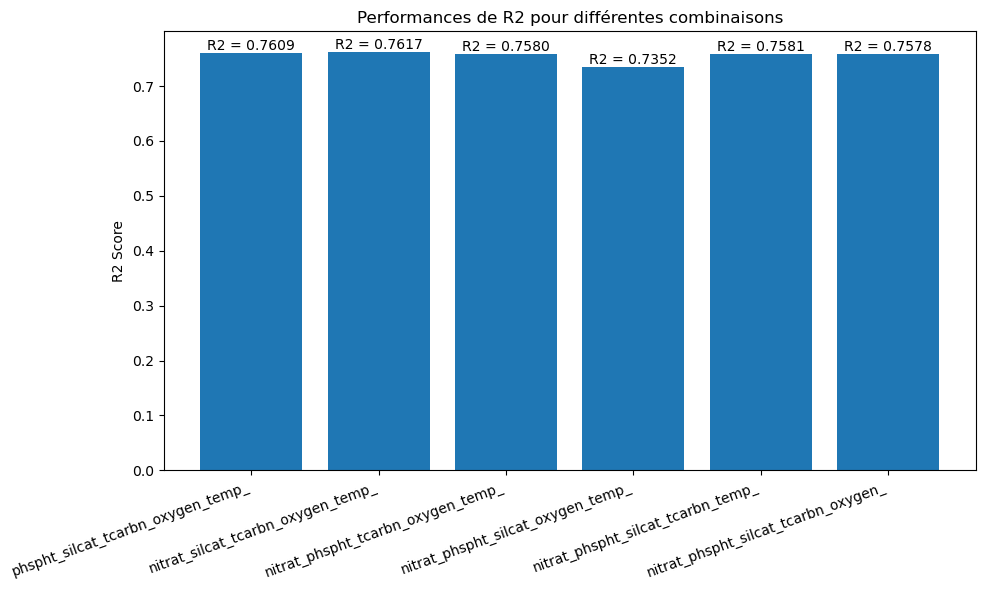

In [120]:
plt.figure(figsize=(10, 6))
plt.bar(Variables, ScoresR2)
plt.ylabel('R2 Score')
plt.title('Performances de R2 pour différentes combinaisons')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
for i, score in enumerate(ScoresR2):
    plt.text(i, score, f'R2 = {score:.4f}', ha='center', va='bottom')

plt.show()

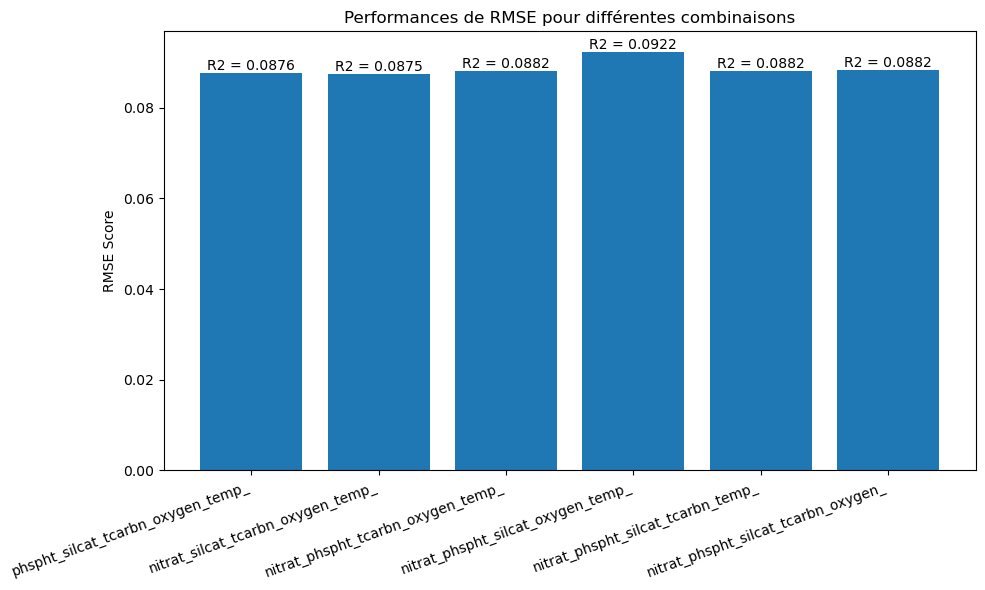

In [121]:
plt.figure(figsize=(10, 6))
plt.bar(Variables, ScoreRmse)
plt.ylabel('RMSE Score')
plt.title('Performances de RMSE pour différentes combinaisons')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
for i, score in enumerate(ScoreRmse):
    plt.text(i, score, f'R2 = {score:.4f}', ha='center', va='bottom')
plt.show()

### Entrainement sur quatre variables

In [123]:
R2_4v={}
Rmse_4v={}
for a in range(0,len(comb4v)):
    xtr=pd.DataFrame()
    xts=pd.DataFrame()
    for i in comb4v[a] :
        for x in i:
            xtr.insert(0,x,X_train[x])
            xts.insert(0,x,X_test[x])
            
    

    grids = GridSearchCV(pipeline,parameters,cv=5,n_jobs=-1)

    grids.fit(xtr,y_train)
    modelrfc=grids.best_estimator_
    ypred=modelrfc.predict(xts)
    scoreR2=r2_score(y_test,ypred)
    scoreRmse = mse(y_test,ypred,squared=False)
    var=''
    for col in xtr.columns:
        var+=col+'_'
    R2_4v[var]=scoreR2
    Rmse_4v[var]=scoreRmse
    print("R2",scoreR2)
    print("Rmse",scoreRmse)
    dump(modelrfc,open('rf_4v_'+var,"wb"))
    print("------")

R2 0.7635212194458494
Rmse 0.08716838331605731
------
R2 0.758343900765693
Rmse 0.08811742208708619
------
R2 0.7594534611192889
Rmse 0.08791489443329126
------
R2 0.7325339888450866
Rmse 0.09270372883793809
------
R2 0.7346599042477098
Rmse 0.09233457265166486
------
R2 0.7333030524440338
Rmse 0.09257035415837858
------
R2 0.7601707960332229
Rmse 0.08778371085872198
------
R2 0.7602466264827613
Rmse 0.08776983180559694
------
R2 0.7571221279447932
Rmse 0.08833989471974985
------
R2 0.7305331298478583
Rmse 0.09304983166198709
------
R2 0.7600675922037923
Rmse 0.08780259646677913
------
R2 0.7600039491487798
Rmse 0.08781424069403454
------
R2 0.7531635851237777
Rmse 0.08905688853950165
------
R2 0.7330303310083325
Rmse 0.09261767278981943
------
R2 0.7483981811244886
Rmse 0.08991244153854018
------


In [124]:
R2_4v

{'silcat_tcarbn_oxygen_temp_': 0.7635212194458494,
 'phspht_tcarbn_oxygen_temp_': 0.758343900765693,
 'nitrat_tcarbn_oxygen_temp_': 0.7594534611192889,
 'phspht_silcat_oxygen_temp_': 0.7325339888450866,
 'nitrat_silcat_oxygen_temp_': 0.7346599042477098,
 'nitrat_phspht_oxygen_temp_': 0.7333030524440338,
 'phspht_silcat_tcarbn_temp_': 0.7601707960332229,
 'nitrat_silcat_tcarbn_temp_': 0.7602466264827613,
 'nitrat_phspht_tcarbn_temp_': 0.7571221279447932,
 'nitrat_phspht_silcat_temp_': 0.7305331298478583,
 'phspht_silcat_tcarbn_oxygen_': 0.7600675922037923,
 'nitrat_silcat_tcarbn_oxygen_': 0.7600039491487798,
 'nitrat_phspht_tcarbn_oxygen_': 0.7531635851237777,
 'nitrat_phspht_silcat_oxygen_': 0.7330303310083325,
 'nitrat_phspht_silcat_tcarbn_': 0.7483981811244886}

In [125]:
Rmse_4v

{'silcat_tcarbn_oxygen_temp_': 0.08716838331605731,
 'phspht_tcarbn_oxygen_temp_': 0.08811742208708619,
 'nitrat_tcarbn_oxygen_temp_': 0.08791489443329126,
 'phspht_silcat_oxygen_temp_': 0.09270372883793809,
 'nitrat_silcat_oxygen_temp_': 0.09233457265166486,
 'nitrat_phspht_oxygen_temp_': 0.09257035415837858,
 'phspht_silcat_tcarbn_temp_': 0.08778371085872198,
 'nitrat_silcat_tcarbn_temp_': 0.08776983180559694,
 'nitrat_phspht_tcarbn_temp_': 0.08833989471974985,
 'nitrat_phspht_silcat_temp_': 0.09304983166198709,
 'phspht_silcat_tcarbn_oxygen_': 0.08780259646677913,
 'nitrat_silcat_tcarbn_oxygen_': 0.08781424069403454,
 'nitrat_phspht_tcarbn_oxygen_': 0.08905688853950165,
 'nitrat_phspht_silcat_oxygen_': 0.09261767278981943,
 'nitrat_phspht_silcat_tcarbn_': 0.08991244153854018}

In [127]:
Variables = list(R2_4v.keys())
ScoresR2 = list(R2_4v.values())
ScoreRmse=list(Rmse_4v.values())
tmp = max(ScoresR2)
index = ScoresR2.index(tmp)

In [128]:
print("La meilleur combinaison pour quatre variables est:",Variables[index])
print("R2",ScoresR2[index])
print("Rmse",ScoreRmse[index])

La meilleur combinaison pour quatre variables est: silcat_tcarbn_oxygen_temp_
R2 0.7635212194458494
Rmse 0.08716838331605731


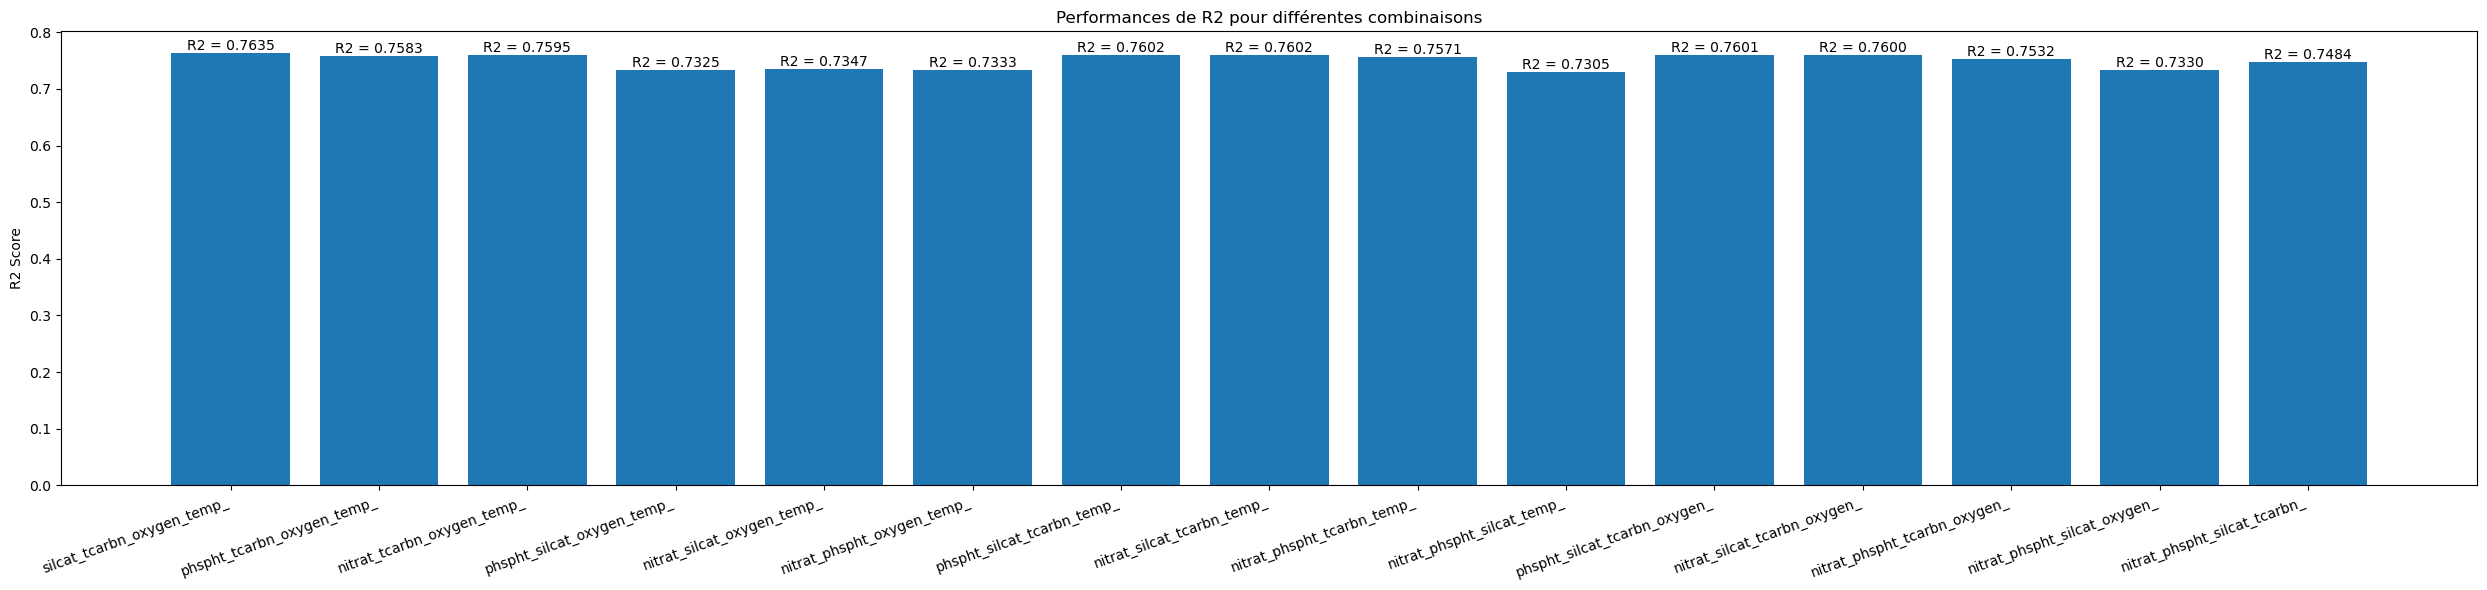

In [129]:
plt.figure(figsize=(25, 6))
plt.bar(Variables, ScoresR2)
plt.ylabel('R2 Score')
plt.title('Performances de R2 pour différentes combinaisons')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
for i, score in enumerate(ScoresR2):
    plt.text(i, score, f'R2 = {score:.4f}', ha='center', va='bottom')

plt.show()

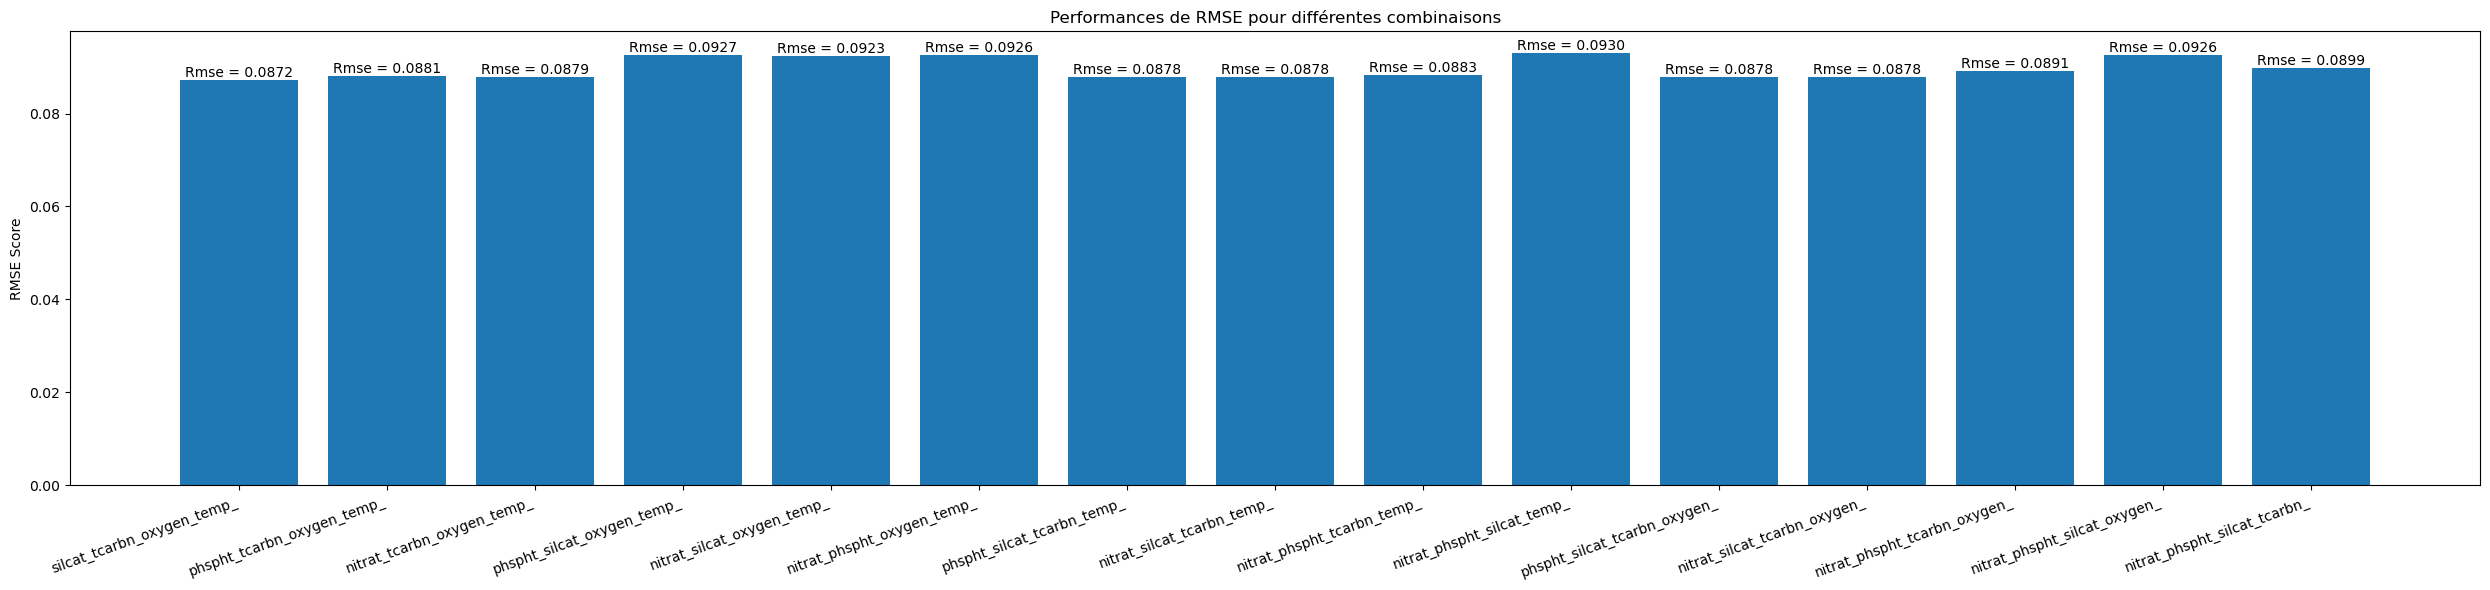

In [130]:
plt.figure(figsize=(25, 6))
plt.bar(Variables, ScoreRmse)
plt.ylabel('RMSE Score')
plt.title('Performances de RMSE pour différentes combinaisons')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
for i, score in enumerate(ScoreRmse):
    plt.text(i, score, f'Rmse = {score:.4f}', ha='center', va='bottom')
plt.show()

### Entrainement sur trois variables 

In [131]:
R2_3v={}
Rmse_3v={}
for a in range(0,len(comb3v)):
    xtr=pd.DataFrame()
    xts=pd.DataFrame()
    for i in comb3v[a] :
        for x in i:
            xtr.insert(0,x,X_train[x])
            xts.insert(0,x,X_test[x])
            
    

    grids = GridSearchCV(pipeline,parameters,cv=5,n_jobs=-1)

    grids.fit(xtr,y_train)
    modelrfc=grids.best_estimator_
    ypred=modelrfc.predict(xts)
    scoreR2=r2_score(y_test,ypred)
    scoreRmse = mse(y_test,ypred,squared=False)
    var=''
    for col in xtr.columns:
        var+=col+'_'
    R2_3v[var]=scoreR2
    Rmse_3v[var]=scoreRmse
    print("R2",scoreR2)
    print("Rmse",scoreRmse)
    pickle.dump(modelrfc,open('rf_3v_'+var,"wb"))
    print("------")

R2 0.7536177796779483
Rmse 0.08897491567056111
------
R2 0.7211190523567279
Rmse 0.09466126972028344
------
R2 0.727583493239409
Rmse 0.09355771634320358
------
R2 0.7299036357983864
Rmse 0.09315845382163213
------
R2 0.7429401741681505
Rmse 0.09088244602907306
------
R2 0.7496178616452612
Rmse 0.0896942442274643
------
R2 0.7508112175208927
Rmse 0.08948024134896178
------
R2 0.7177945116673471
Rmse 0.09522382677919726
------
R2 0.7183506545824612
Rmse 0.09512995161432401
------
R2 0.7244092682792842
Rmse 0.09410120975147394
------
R2 0.754654228429767
Rmse 0.08878757437760952
------
R2 0.7470186649711288
Rmse 0.09015859657572649
------
R2 0.7476390136318543
Rmse 0.09004798743967113
------
R2 0.7277408923915472
Rmse 0.09353068414692936
------
R2 0.7287112185101607
Rmse 0.0933638646171217
------
R2 0.7260403226915157
Rmse 0.09382233251586808
------
R2 0.7423164951413195
Rmse 0.09099262881780781
------
R2 0.7397281169772961
Rmse 0.09144848810857568
------
R2 0.7235999157394681
Rmse 0.094

In [132]:
 R2_3v

{'tcarbn_oxygen_temp_': 0.7536177796779483,
 'silcat_oxygen_temp_': 0.7211190523567279,
 'phspht_oxygen_temp_': 0.727583493239409,
 'nitrat_oxygen_temp_': 0.7299036357983864,
 'silcat_tcarbn_temp_': 0.7429401741681505,
 'phspht_tcarbn_temp_': 0.7496178616452612,
 'nitrat_tcarbn_temp_': 0.7508112175208927,
 'phspht_silcat_temp_': 0.7177945116673471,
 'nitrat_silcat_temp_': 0.7183506545824612,
 'nitrat_phspht_temp_': 0.7244092682792842,
 'silcat_tcarbn_oxygen_': 0.754654228429767,
 'phspht_tcarbn_oxygen_': 0.7470186649711288,
 'nitrat_tcarbn_oxygen_': 0.7476390136318543,
 'phspht_silcat_oxygen_': 0.7277408923915472,
 'nitrat_silcat_oxygen_': 0.7287112185101607,
 'nitrat_phspht_oxygen_': 0.7260403226915157,
 'phspht_silcat_tcarbn_': 0.7423164951413195,
 'nitrat_silcat_tcarbn_': 0.7397281169772961,
 'nitrat_phspht_tcarbn_': 0.7235999157394681,
 'nitrat_phspht_silcat_': 0.7162427808942213}

In [133]:
Rmse_3v

{'tcarbn_oxygen_temp_': 0.08897491567056111,
 'silcat_oxygen_temp_': 0.09466126972028344,
 'phspht_oxygen_temp_': 0.09355771634320358,
 'nitrat_oxygen_temp_': 0.09315845382163213,
 'silcat_tcarbn_temp_': 0.09088244602907306,
 'phspht_tcarbn_temp_': 0.0896942442274643,
 'nitrat_tcarbn_temp_': 0.08948024134896178,
 'phspht_silcat_temp_': 0.09522382677919726,
 'nitrat_silcat_temp_': 0.09512995161432401,
 'nitrat_phspht_temp_': 0.09410120975147394,
 'silcat_tcarbn_oxygen_': 0.08878757437760952,
 'phspht_tcarbn_oxygen_': 0.09015859657572649,
 'nitrat_tcarbn_oxygen_': 0.09004798743967113,
 'phspht_silcat_oxygen_': 0.09353068414692936,
 'nitrat_silcat_oxygen_': 0.0933638646171217,
 'nitrat_phspht_oxygen_': 0.09382233251586808,
 'phspht_silcat_tcarbn_': 0.09099262881780781,
 'nitrat_silcat_tcarbn_': 0.09144848810857568,
 'nitrat_phspht_tcarbn_': 0.09423928627043092,
 'nitrat_phspht_silcat_': 0.0954852660226927}

In [134]:
Variables = list(R2_3v.keys())
ScoresR2 = list(R2_3v.values())
ScoreRmse=list(Rmse_3v.values())
tmp = max(ScoresR2)
index = ScoresR2.index(tmp)

In [135]:
print("La meilleur combinaison pour quatre variables est:",Variables[index])
print("R2",ScoresR2[index])
print("Rmse",ScoreRmse[index])

La meilleur combinaison pour quatre variables est: silcat_tcarbn_oxygen_
R2 0.754654228429767
Rmse 0.08878757437760952


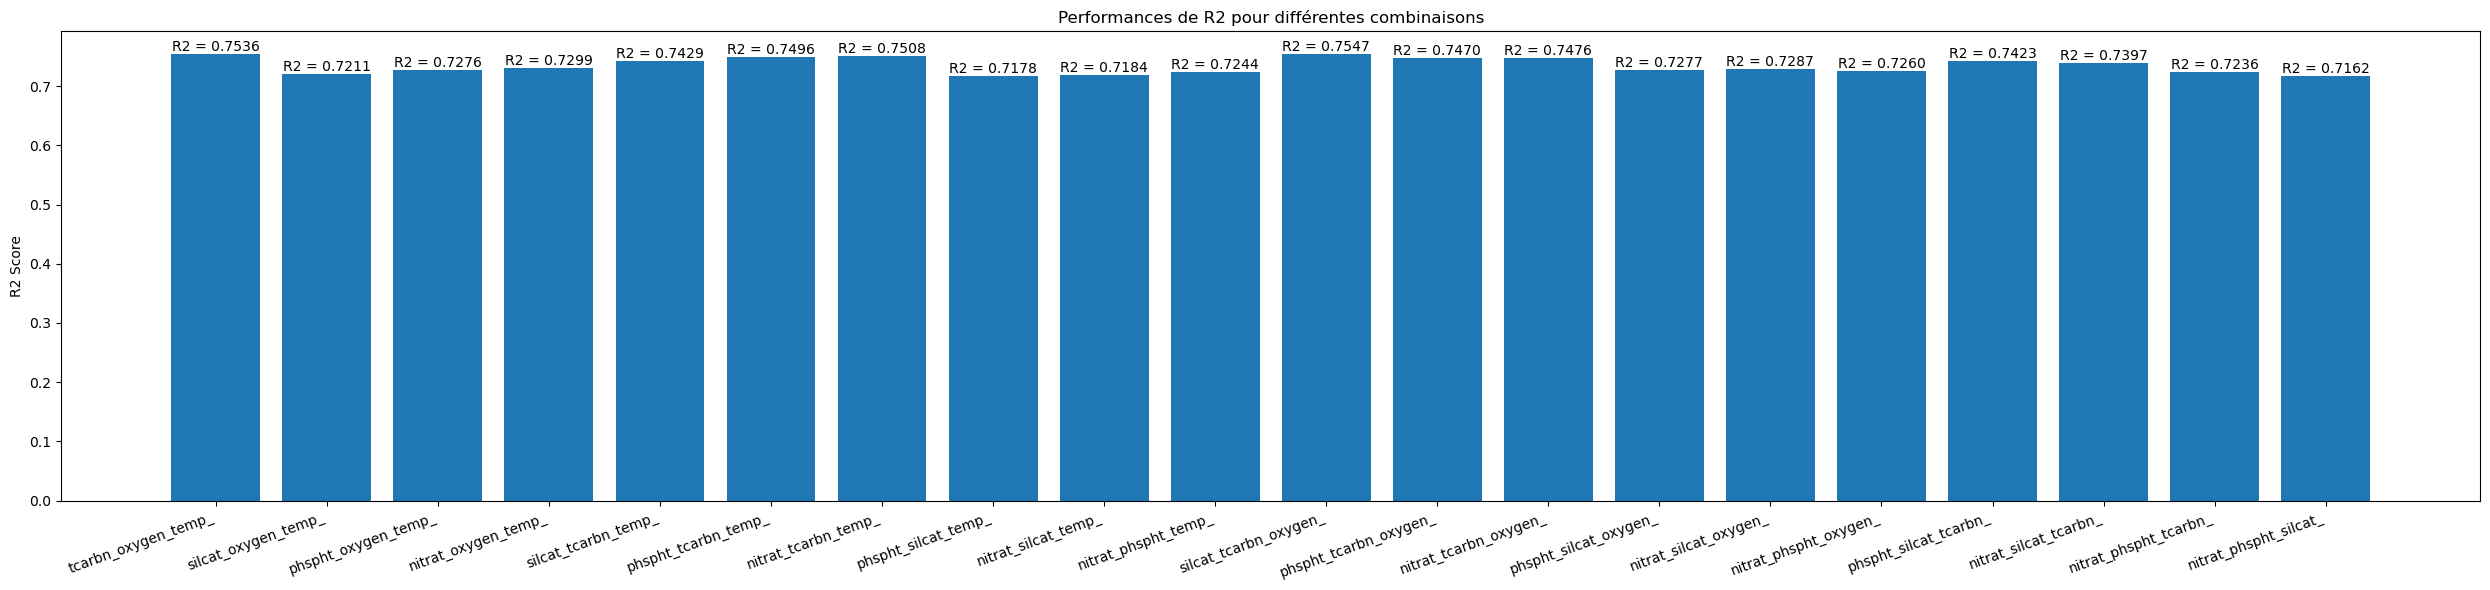

In [136]:
plt.figure(figsize=(25, 6))
plt.bar(Variables, ScoresR2)
plt.ylabel('R2 Score')
plt.title('Performances de R2 pour différentes combinaisons')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
for i, score in enumerate(ScoresR2):
    plt.text(i, score, f'R2 = {score:.4f}', ha='center', va='bottom')

plt.show()

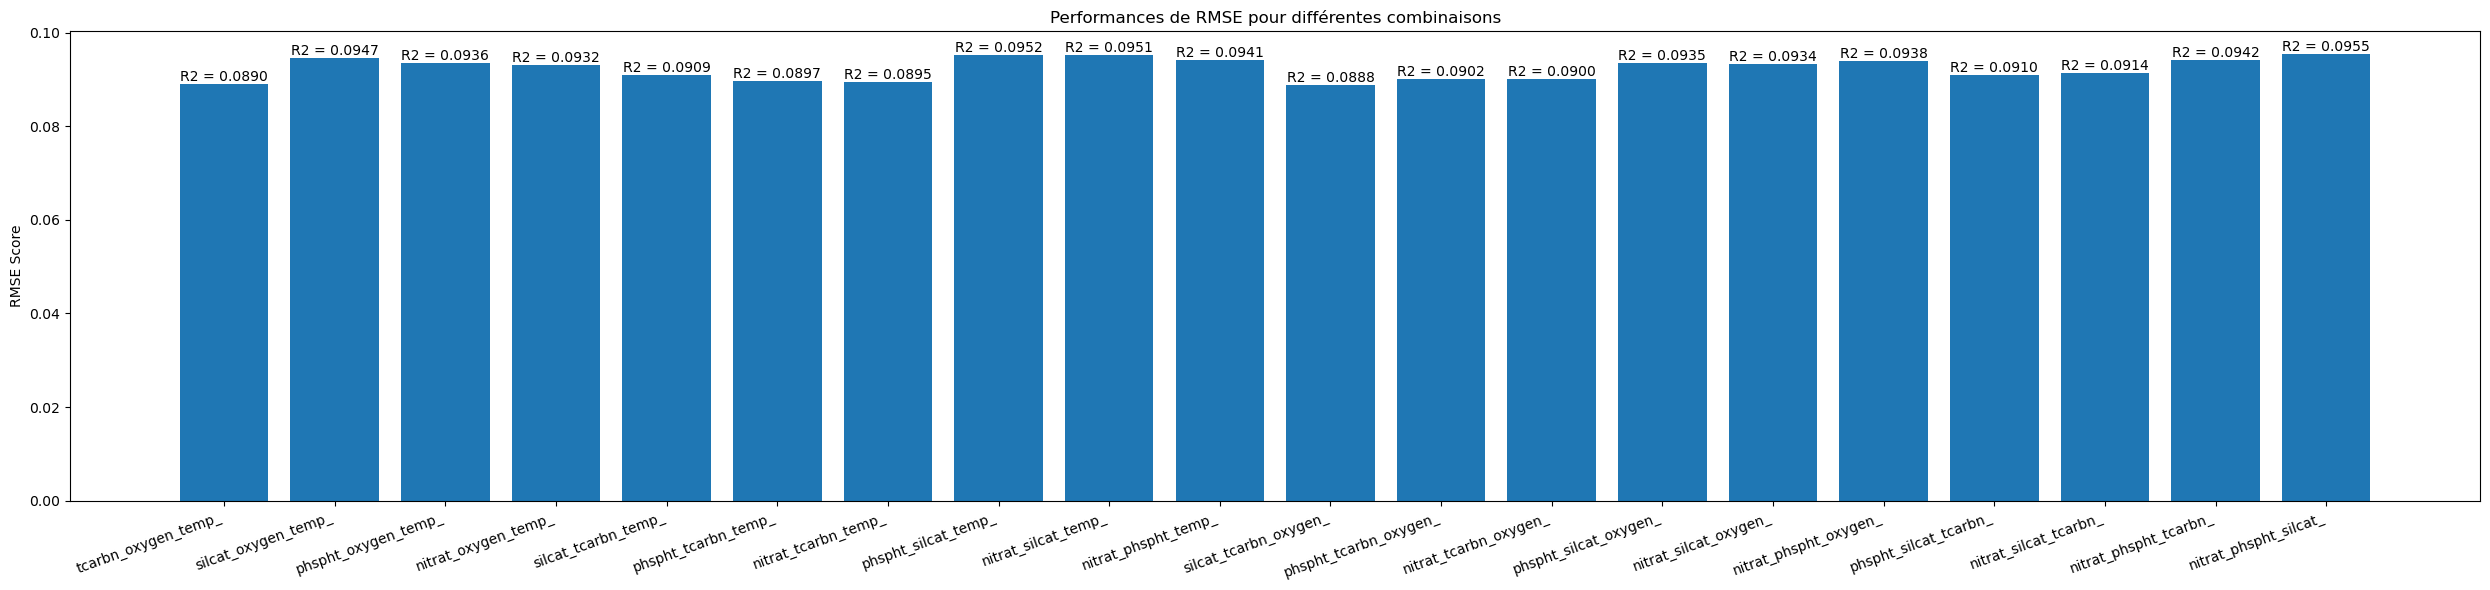

In [137]:
plt.figure(figsize=(25, 6))
plt.bar(Variables, ScoreRmse)
plt.ylabel('RMSE Score')
plt.title('Performances de RMSE pour différentes combinaisons')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
for i, score in enumerate(ScoreRmse):
    plt.text(i, score, f'R2 = {score:.4f}', ha='center', va='bottom')
plt.show()

### Entrainement sur deux variables

In [ ]:
R2_2v={}
Rmse_2v={}
for a in range(0,len(comb2v)):
    xtr=pd.DataFrame()
    xts=pd.DataFrame()
    for i in comb2v[a] :
        for x in i:
            xtr.insert(0,x,X_train[x])
            xts.insert(0,x,X_test[x])
            
    

    grids = GridSearchCV(pipeline,parameters,cv=5,n_jobs=-1)

    grids.fit(xtr,y_train)
    modelrfc=grids.best_estimator_
    ypred=modelrfc.predict(xts)
    scoreR2=r2_score(y_test,ypred)
    scoreRmse = mse(y_test,ypred,squared=False)
    var=''
    for col in xtr.columns:
        var+=col+'_'
    R2_2v[var]=scoreR2
    Rmse_2v[var]=scoreRmse
    print("R2",scoreR2)
    print("Rmse",scoreRmse)
    dump(modelrfc,open('rf_2v_'+var,"wb"))
    print("------")

In [ ]:
R2_2v

In [ ]:
Rmse_2v

In [ ]:
Variables = list(R2_5v.keys())
ScoresR2 = list(R2_5v.values())
ScoreRmse=list(Rmse_5v.values())
tmp = max(ScoresR2)
index = ScoresR2.index(tmp)

In [ ]:
print("La meilleur combinaison pour quatre variables est:",Variables[index])
print("R2",ScoresR2[index])
print("Rmse",ScoreRmse[index])

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(Variables, ScoresR2)
plt.ylabel('R2 Score')
plt.title('Performances de R2 pour différentes combinaisons')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
for i, score in enumerate(ScoresR2):
    plt.text(i, score, f'R2 = {score:.4f}', ha='center', va='bottom')

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(Variables, ScoreRmse)
plt.ylabel('RMSE Score')
plt.title('Performances de RMSE pour différentes combinaisons')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
for i, score in enumerate(ScoreRmse):
    plt.text(i, score, f'R2 = {score:.4f}', ha='center', va='bottom')
plt.show()

### Entrainement sur un variables 

In [138]:
R2_1v={}
Rmse_1v={}
for a in range(0,len(comb1v)):
    xtr=pd.DataFrame()
    xts=pd.DataFrame()
    for i in comb1v[a] :
        for x in i:
            xtr.insert(0,x,X_train[x])
            xts.insert(0,x,X_test[x])
            
    

    grids = GridSearchCV(pipeline,parameters,cv=5,n_jobs=-1)

    grids.fit(xtr,y_train)
    modelrfc=grids.best_estimator_
    ypred=modelrfc.predict(xts)
    scoreR2=r2_score(y_test,ypred)
    scoreRmse = mse(y_test,ypred,squared=False)
    var=''
    for col in xtr.columns:
        var+=col+'_'
    R2_1v[var]=scoreR2
    Rmse_1v[var]=scoreRmse
    print("R2",scoreR2)
    print("Rmse",scoreRmse)
    dump(modelrfc,open('rf_1v_'+var,"wb"))
    print("------")

R2 0.50078833010125
Rmse 0.12665002134250392
------
R2 0.5863719629136888
Rmse 0.1152836948629887
------
R2 0.6497072749610298
Rmse 0.10609098012691462
------
R2 0.5618685337848084
Rmse 0.11864928493991733
------
R2 0.688035541238359
Rmse 0.10011876001705838
------
R2 0.6830469315955239
Rmse 0.10091608246848974
------


In [139]:
 R2_1v

{'temp_': 0.50078833010125,
 'oxygen_': 0.5863719629136888,
 'tcarbn_': 0.6497072749610298,
 'silcat_': 0.5618685337848084,
 'phspht_': 0.688035541238359,
 'nitrat_': 0.6830469315955239}

In [140]:
Rmse_1v

{'temp_': 0.12665002134250392,
 'oxygen_': 0.1152836948629887,
 'tcarbn_': 0.10609098012691462,
 'silcat_': 0.11864928493991733,
 'phspht_': 0.10011876001705838,
 'nitrat_': 0.10091608246848974}

In [141]:
Variables = list(R2_1v.keys())
ScoresR2 = list(R2_1v.values())
ScoreRmse=list(Rmse_1v.values())
tmp = max(ScoresR2)
index = ScoresR2.index(tmp)

In [142]:
print("La meilleur combinaison pour quatre variables est:",Variables[index])
print("R2",ScoresR2[index])
print("Rmse",ScoreRmse[index])

La meilleur combinaison pour quatre variables est: phspht_
R2 0.688035541238359
Rmse 0.10011876001705838


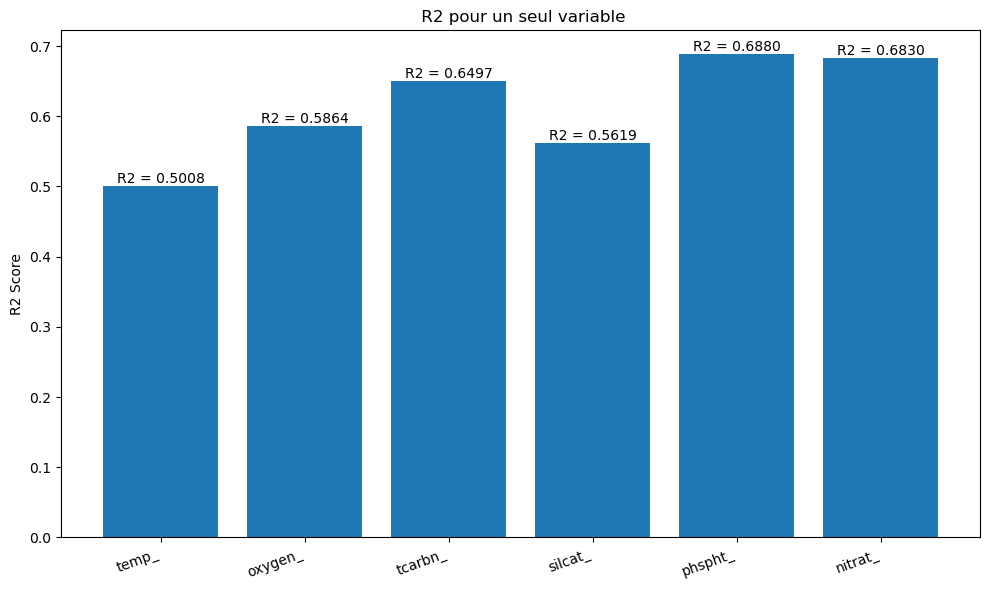

In [145]:
plt.figure(figsize=(10, 6))
plt.bar(Variables, ScoresR2)
plt.ylabel('R2 Score')
plt.title(' R2 pour un seul variable')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
for i, score in enumerate(ScoresR2):
    plt.text(i, score, f'R2 = {score:.4f}', ha='center', va='bottom')

plt.show()

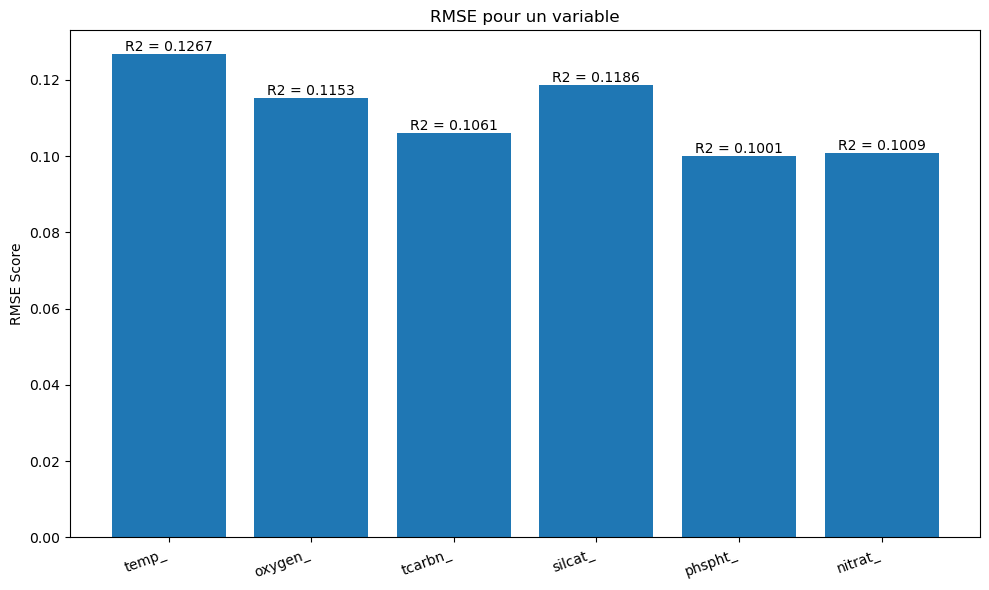

In [146]:
plt.figure(figsize=(10, 6))
plt.bar(Variables, ScoreRmse)
plt.ylabel('RMSE Score')
plt.title('RMSE pour un variable')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
for i, score in enumerate(ScoreRmse):
    plt.text(i, score, f'R2 = {score:.4f}', ha='center', va='bottom')
plt.show()